# **Housing price prediction**

In [433]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [501]:
df= pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [435]:
df.shape

(21613, 21)

In [436]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [437]:
df.describe(include='object')

,date
count,21613
unique,372
top,20140623T000000
freq,142


In [438]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [439]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [440]:
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [441]:
df.duplicated().sum()

0

In [442]:
df['date']=pd.to_datetime(df['date'])

In [443]:
df['year']=df['date'].dt.year
df['month']= df['date'].dt.month
df['day']= df['date'].dt.day

In [444]:
df.drop(df.columns[[0, 1, 16,19,20]], axis=1, inplace=True)

In [445]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,year,month,day
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,2014,10,13
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,2014,12,9
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2015,2,25
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,2014,12,9
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,2015,2,18


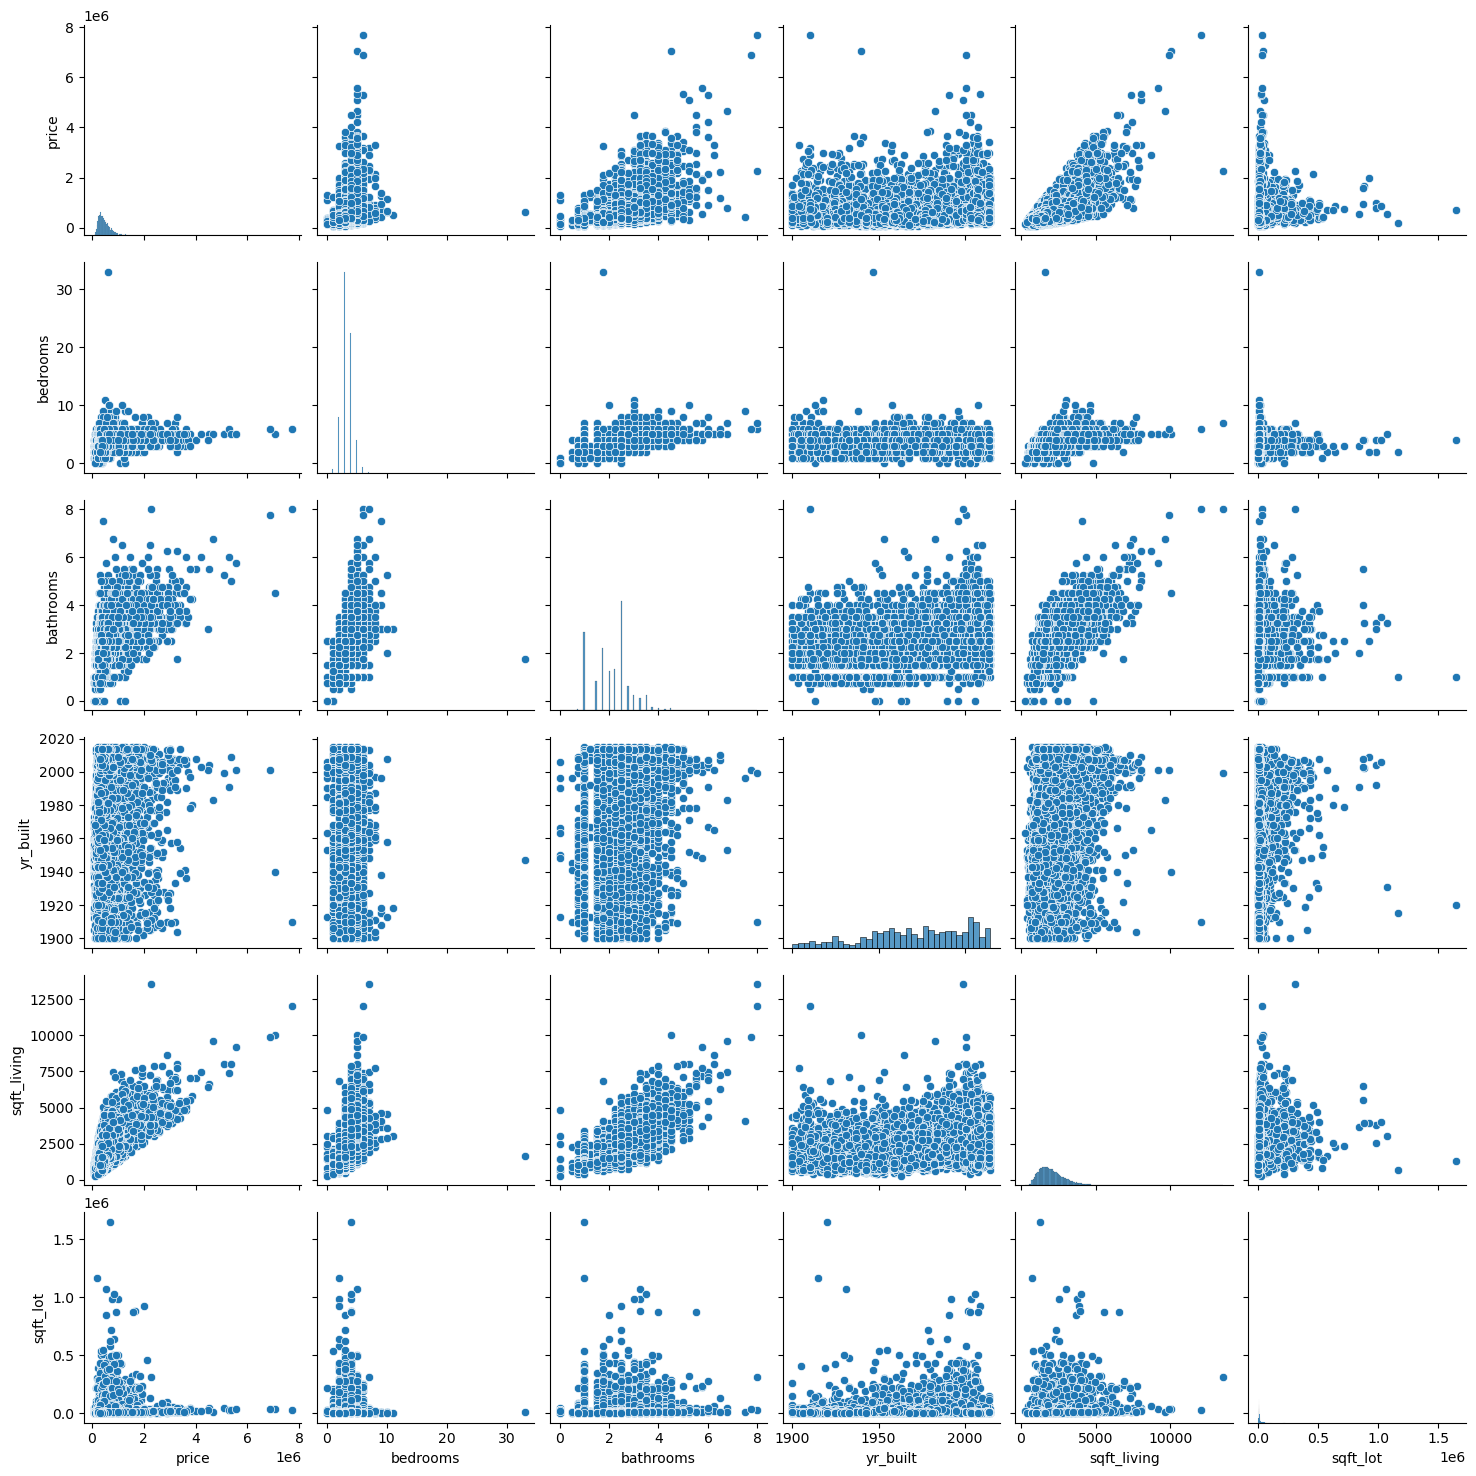

In [446]:
sns.pairplot(df[['price','bedrooms','bathrooms','yr_built','sqft_living','sqft_lot']])

<Axes: >

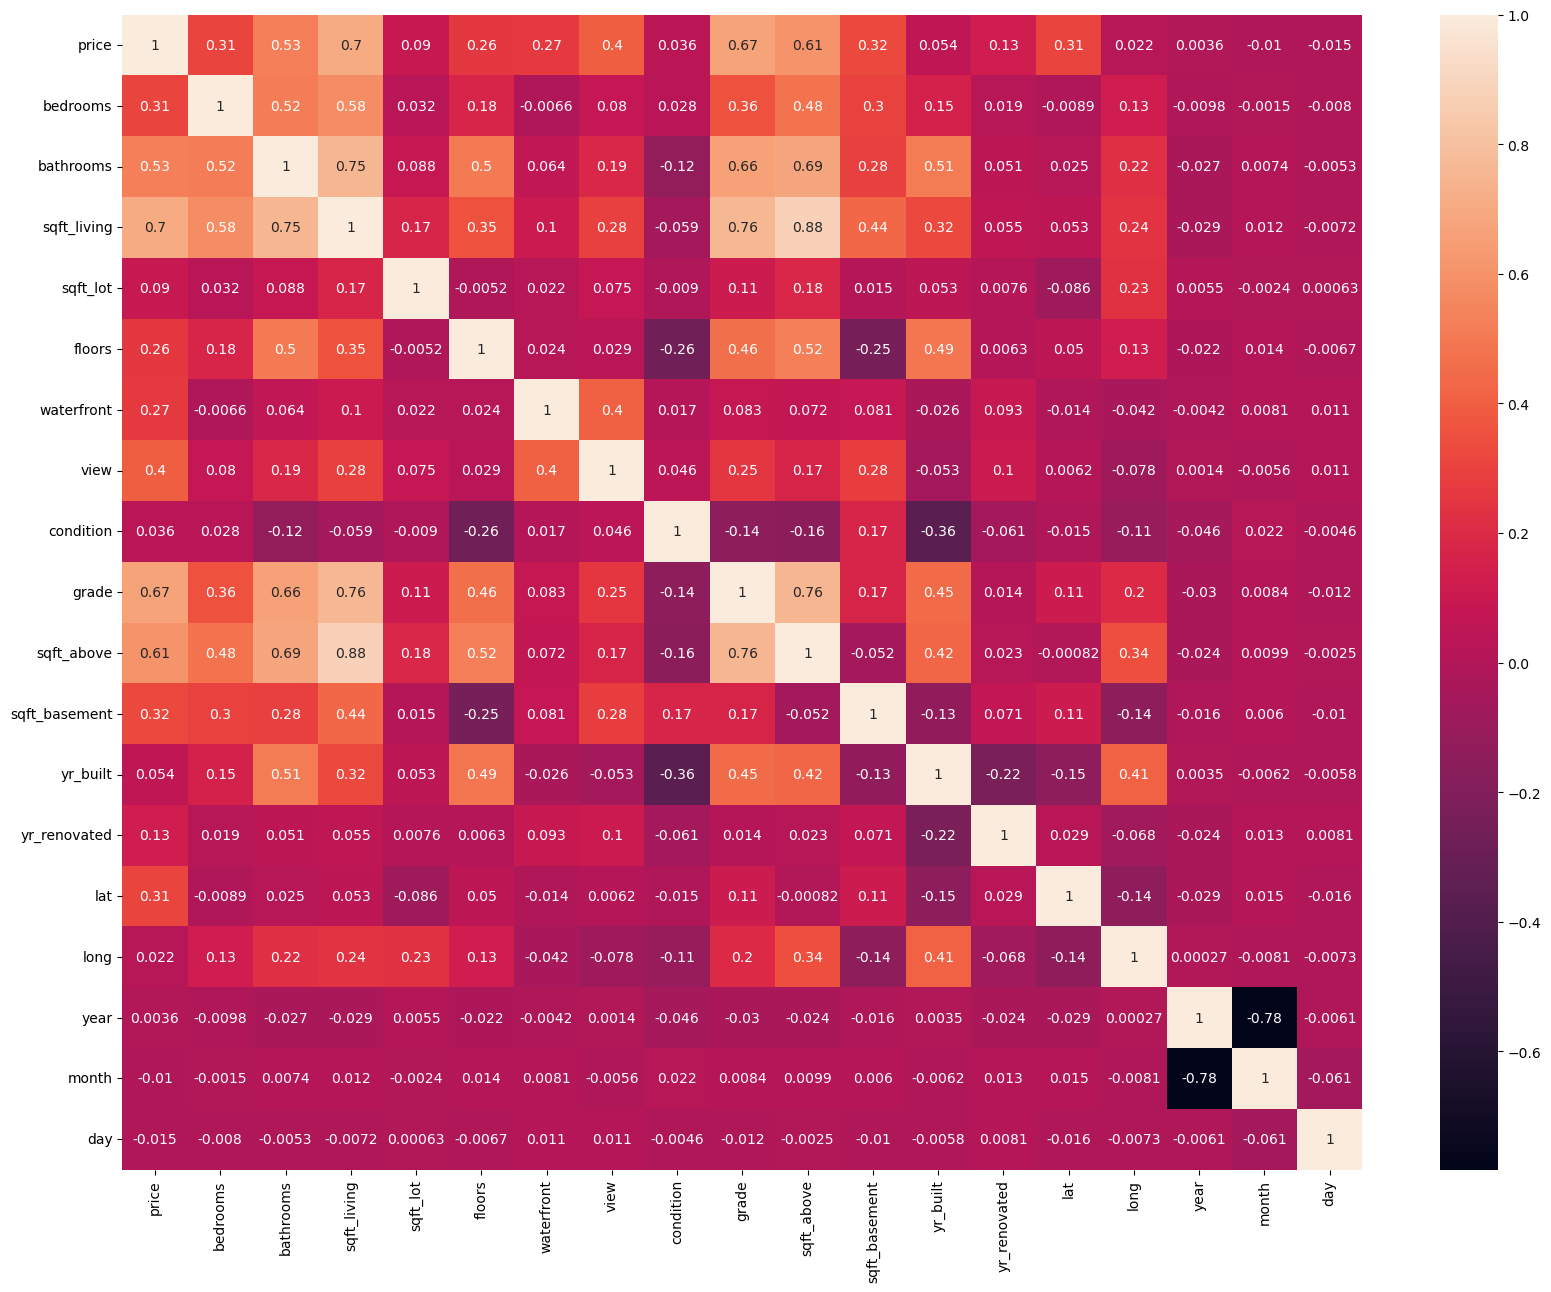

In [447]:
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='price', ylabel='Density'>

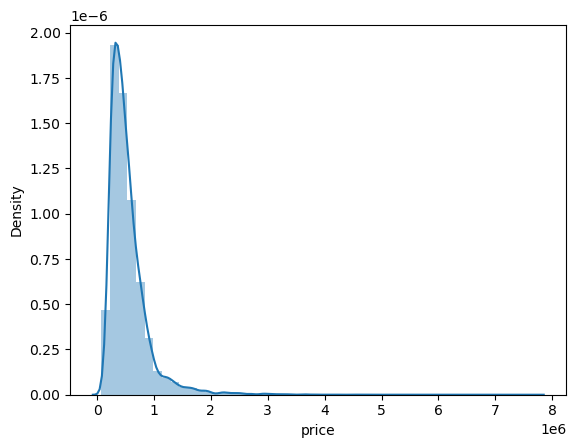

In [450]:
sns.distplot(df['price'])

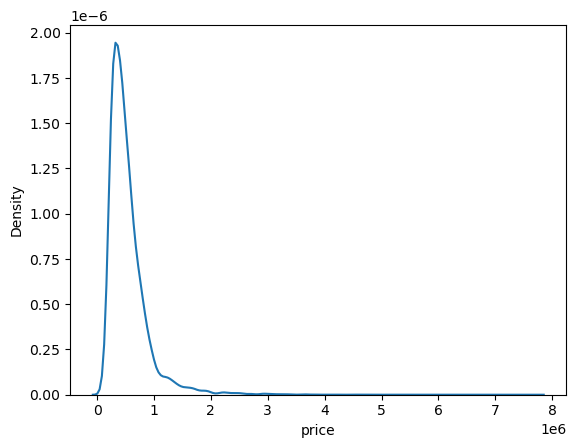

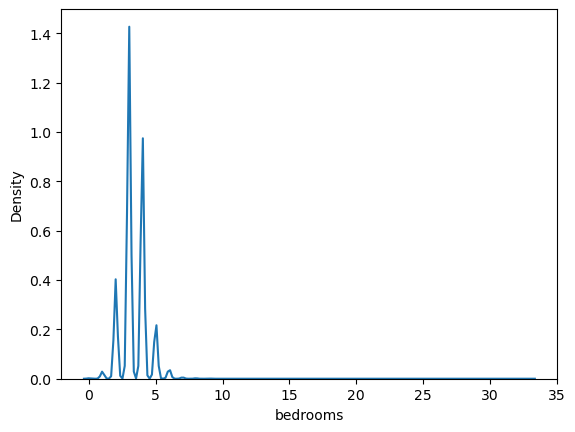

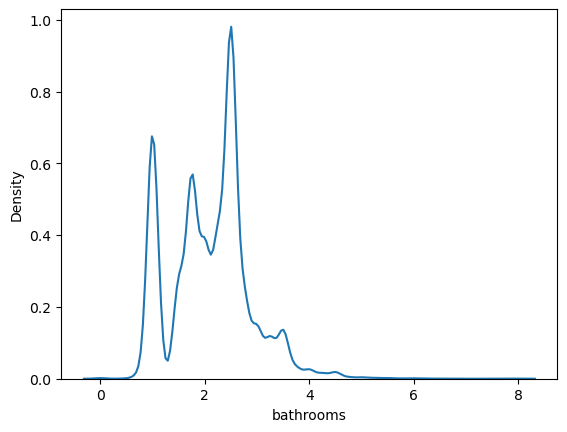

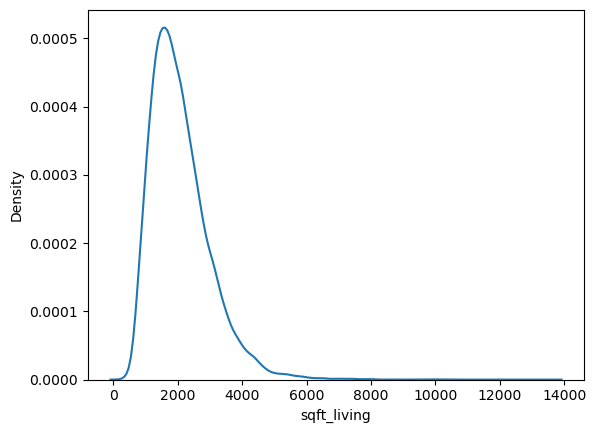

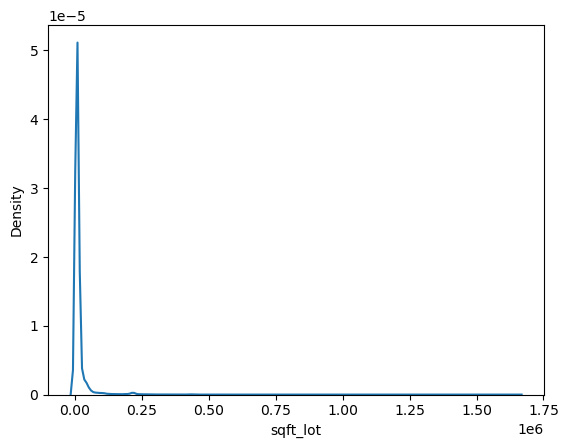

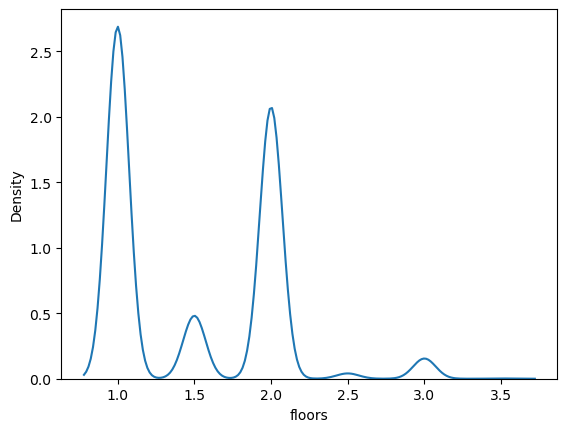

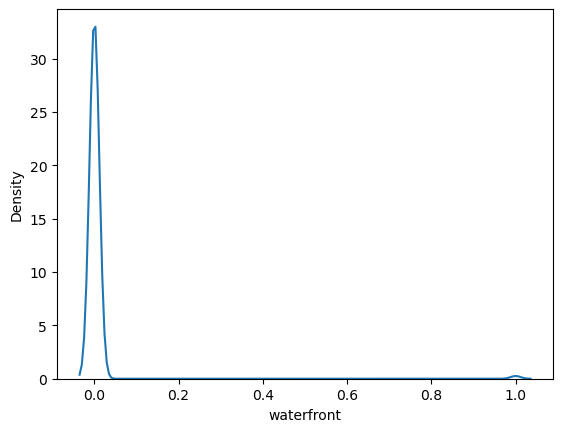

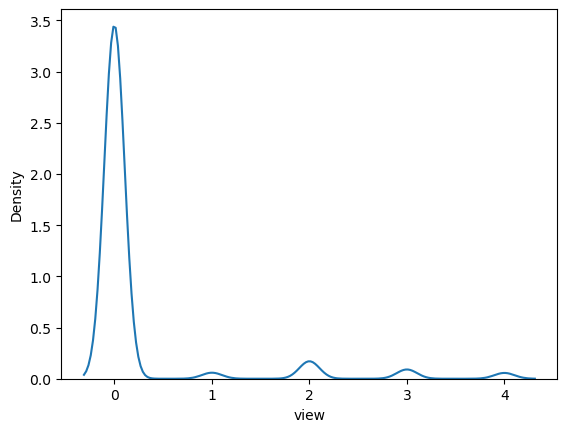

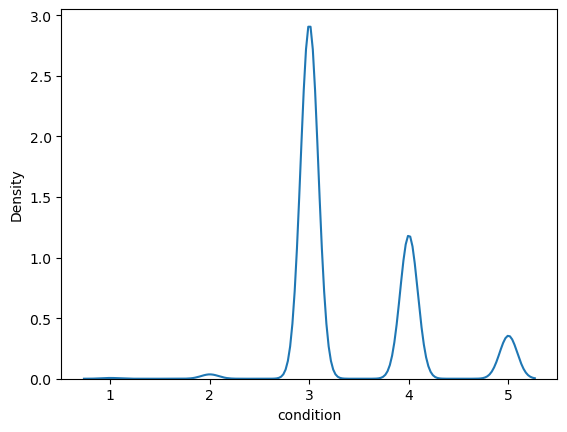

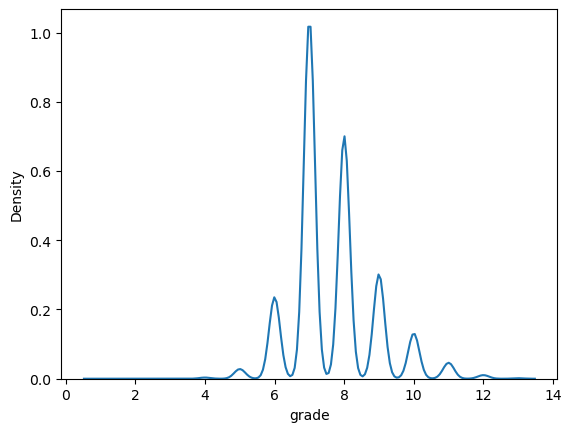

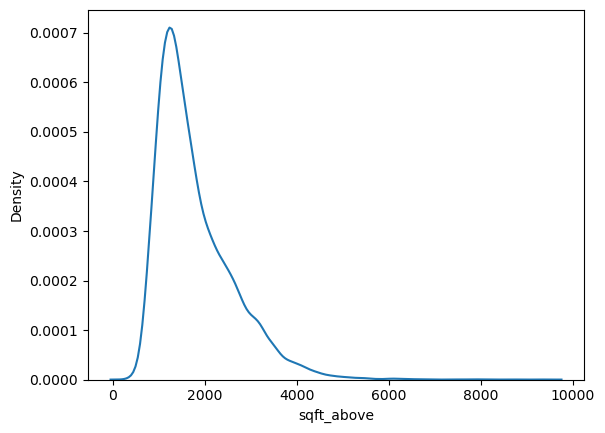

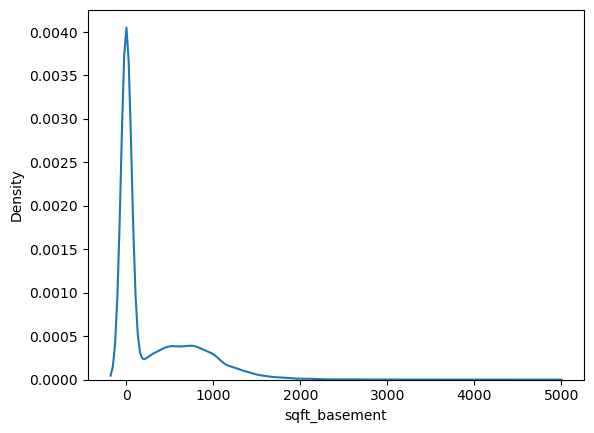

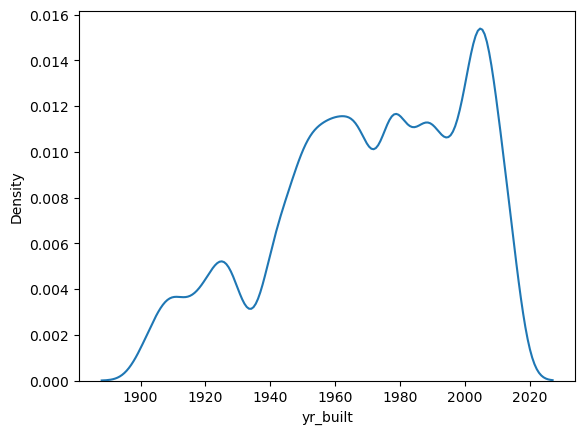

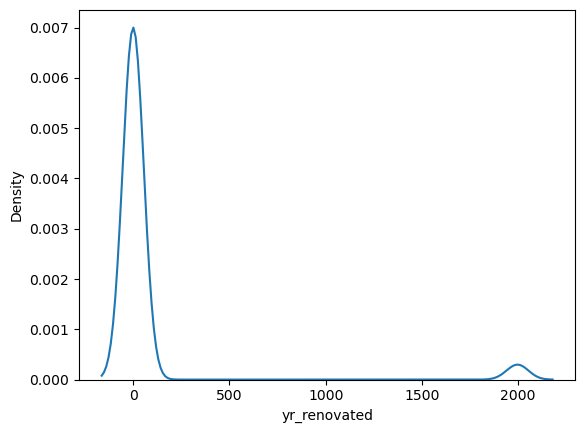

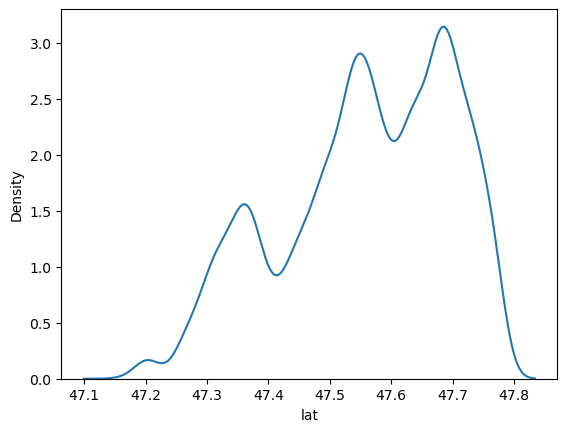

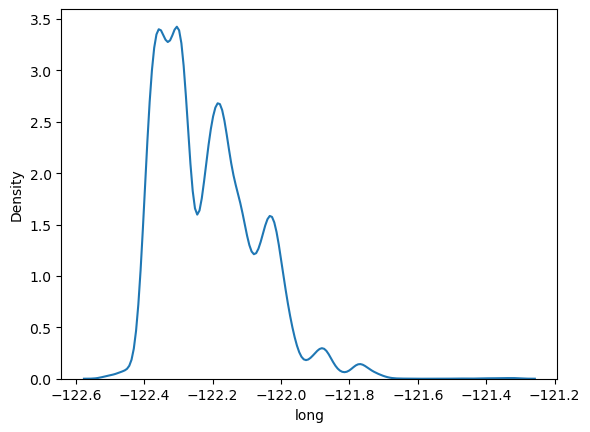

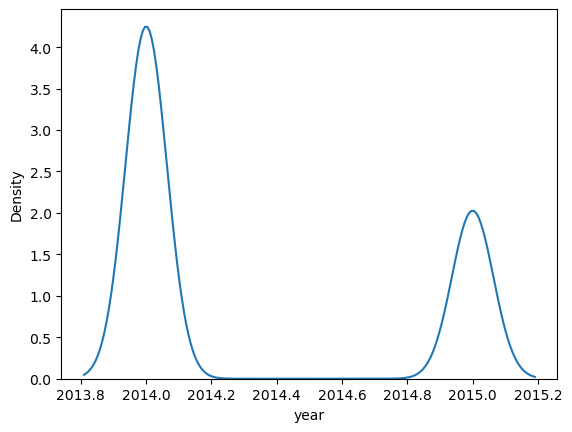

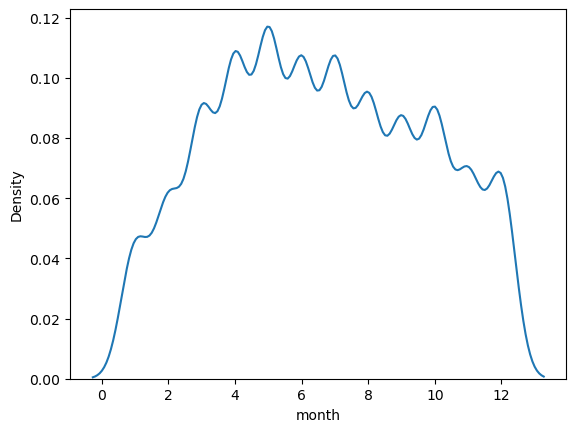

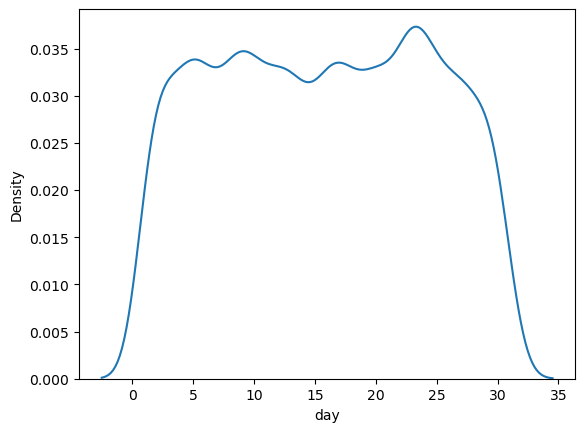

In [451]:
for i in df.select_dtypes(include='number').columns:
    sns.kdeplot(data=df,x=i)
    plt.show()

In [452]:
df['price']=np.log10(df['price'])

<Axes: xlabel='price', ylabel='Density'>

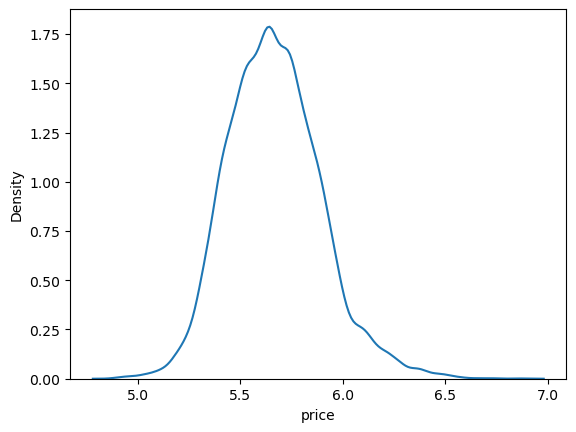

In [453]:
sns.kdeplot(data=df,x=df['price'])

## *Create and train the model*

In [454]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [455]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

x= sm.add_constant(x)

In [456]:
x_train,x_test,y_trian,y_test =train_test_split(x, y, test_size=0.30)

In [457]:
model =sm.OLS(y_trian,x_train).fit()

In [458]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     2904.
Date:                Tue, 06 Aug 2024   Prob (F-statistic):               0.00
Time:                        15:30:53   Log-Likelihood:                 11796.
No. Observations:               15129   AIC:                        -2.356e+04
Df Residuals:                   15111   BIC:                        -2.342e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -73.1364      6.355    -11.508      0.000     -85.594     -60.679
bedrooms         -0.0055      0.001     -4.481      0.000      -0.008      -0.003
bathrooms         0.0320      0.002     14.923      0.000       0.028       0.036
sqft_living      5.1e-05    1.4e-06     36.402      0.000    4.83e-05    5.37e-05
sqft_lot       1.484e-07   2.23e-08      6.662      0.000    1.05e-07    1.92e-07
floors            0.0226      0.002      9.645      0.000       0.018       0.027
waterfront        0.1524      0.012     13.064      0.000       0.130       0.175
view              0.0282      0.001     20.178      0.000       0.026       0.031
condition         0.0301      0.002     19.566      0.000       0.027       0.033
grade             0.0783      0.001     57.886      0.000       0.076       0.081
sqft_above     2.687e-05   1.41e-06     19.123      0.000    2.41e-05    2.96e-05
sqft_basement  2.413e-05   1.74e-06     13.867      0.000    2.07e-05    2.75e-05
yr_built         -0.0014   4.73e-05    -30.210      0.000      -0.002      -0.001
yr_renovated   1.792e-05   2.41e-06      7.444      0.000    1.32e-05    2.26e-05
lat               0.5995      0.007     86.361      0.000       0.586       0.613
long              0.0106      0.008      1.387      0.165      -0.004       0.026
year              0.0265      0.003      8.513      0.000       0.020       0.033
month             0.0009      0.000      1.981      0.048    9.63e-06       0.002
day              -0.0002      0.000     -2.017      0.044      -0.000      -6e-06
==============================================================================
Omnibus:                      402.623   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1004.845
Skew:                          -0.015   Prob(JB):                    6.32e-219
Kurtosis:                       4.262   Cond. No.                     2.39e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.4e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [459]:
y_predict= model.predict(x_test)
y_predict

4996     5.602925
12503    5.753652
20809    5.952253
4156     5.448424
20153    5.521391
           ...   
11553    5.535611
7145     5.551110
21599    5.961600
10409    5.543993
1971     5.552341
Length: 6484, dtype: float64

In [460]:
residual= y_test - y_predict
residual

4996    -0.094530
12503   -0.100439
20809   -0.049217
4156    -0.102071
20153    0.057248
           ...   
11553   -0.058491
7145     0.061674
21599   -0.053115
10409   -0.114241
1971    -0.154401
Length: 6484, dtype: float64

## **Linear regression hypothesis and metrics score**

In [461]:
from sklearn import metrics
R2=metrics.r2_score(y_test,y_predict)
R2

0.7581934137365807

In [462]:
print(metrics.mean_absolute_error(y_test,y_predict))

0.08604606519867776


In [463]:
print(metrics.mean_squared_error(y_test,y_predict))

0.01251681314292342


In [464]:
print(np.sqrt(metrics.mean_squared_error(y_test,y_predict)))

0.111878564269137


In [465]:
y_test.mean()

5.660756293281322

In [466]:
0.2544341150979956/13.054657084605568

0.019489911795387695

In [467]:
residual.mean()

-0.004646739046305795

0.0035926456382657456


<Axes: ylabel='Density'>

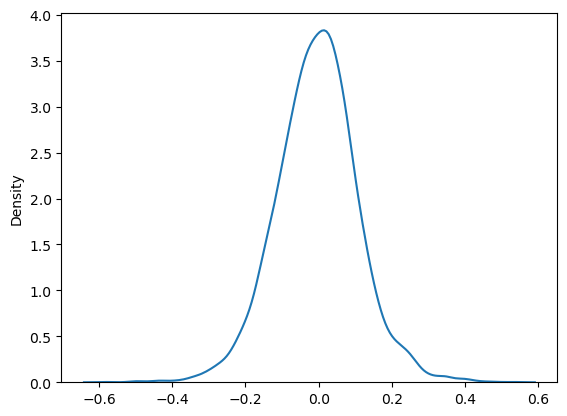

In [468]:
print(residual.skew())
sns.kdeplot(residual)

<Axes: >

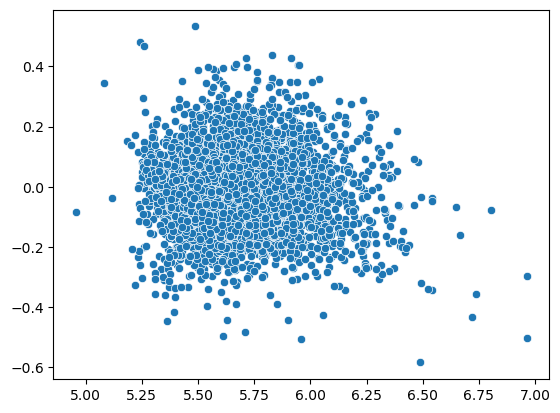

In [469]:
sns.scatterplot(x=y_predict,y=residual)

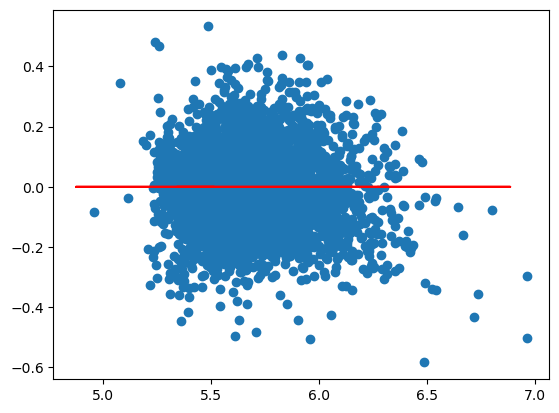

In [470]:
plt.scatter(y_predict, residual)
plt.plot(y, [0]*len(y),color='r')

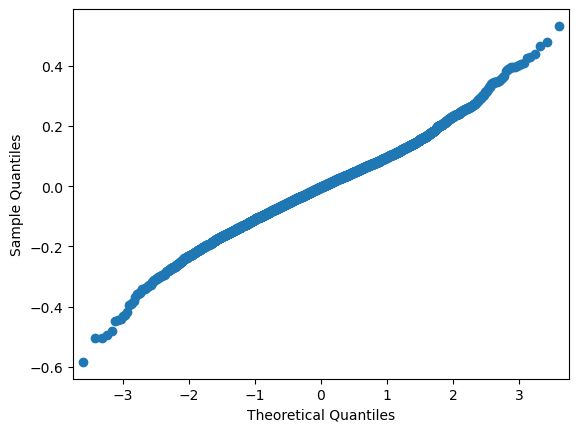

In [471]:
sm.qqplot(residual)
plt.show()

<Axes: ylabel='Density'>

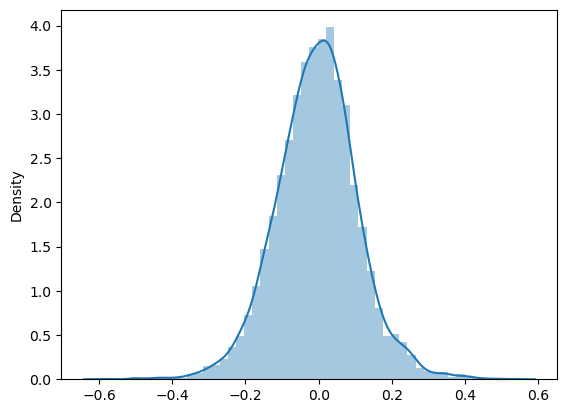

In [472]:
sns.distplot(residual)

In [473]:
def best_fit(X, Y):

    xbar = sum(X)/len(X)
    ybar = sum(Y)/len(Y)
    n = len(X) # or len(Y)

    numer = sum([xi*yi for xi,yi in zip(X, Y)]) - n * xbar * ybar
    denum = sum([xi**2 for xi in X]) - n * xbar**2

    b = numer / denum
    a = ybar - b * xbar

    print('best fit line:\ny = {:.2f} + {:.2f}x'.format(a, b))

    return a, b

In [474]:
Xtest=x_test.copy()
Xtest.drop(Xtest.columns[0],axis=1,inplace=True)

## Finding the best fit line

best fit line:
y = 114860.46 + 123978.99x


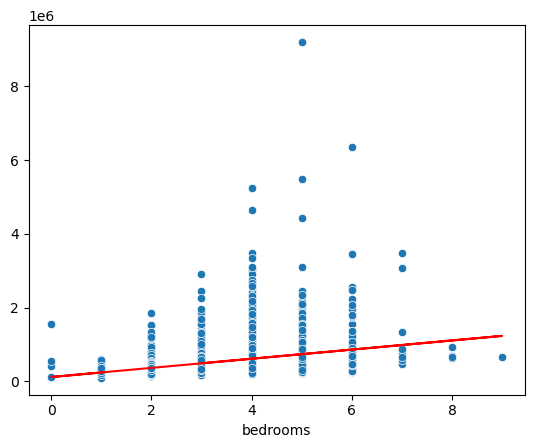

best fit line:
y = 42936.20 + 230910.01x


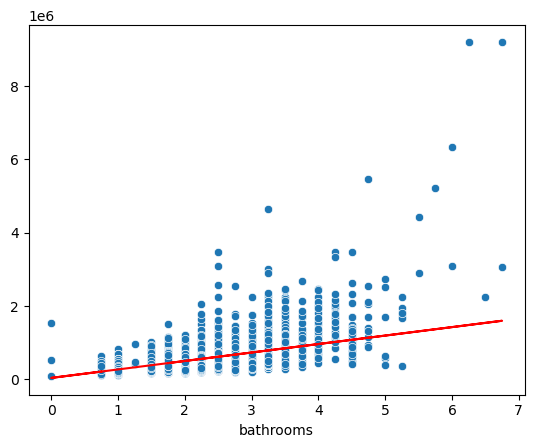

best fit line:
y = -24188.25 + 267.65x


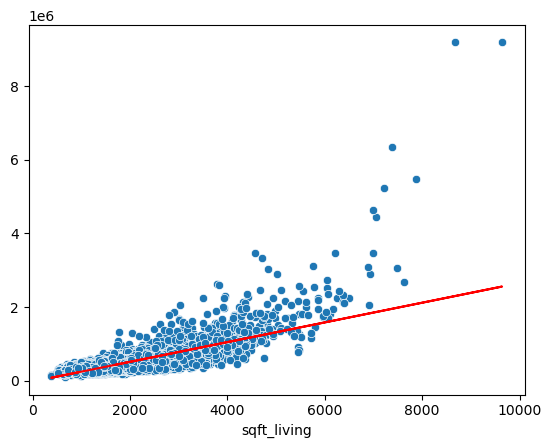

best fit line:
y = 518560.95 + 0.89x


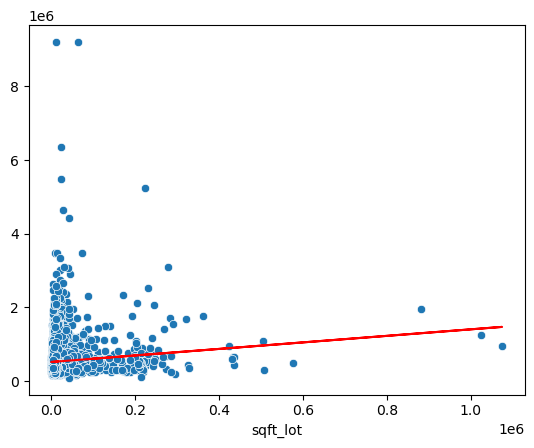

best fit line:
y = 275366.19 + 171619.76x


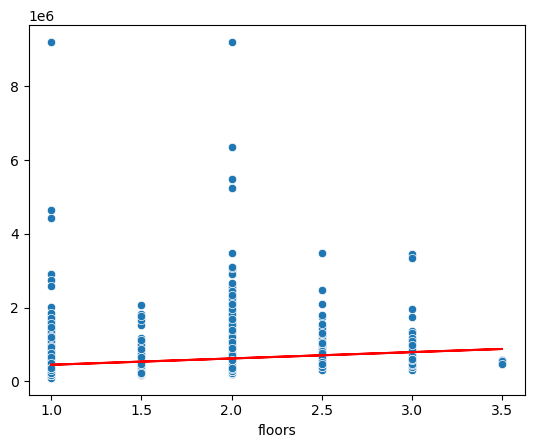

best fit line:
y = 522712.10 + 1085256.41x


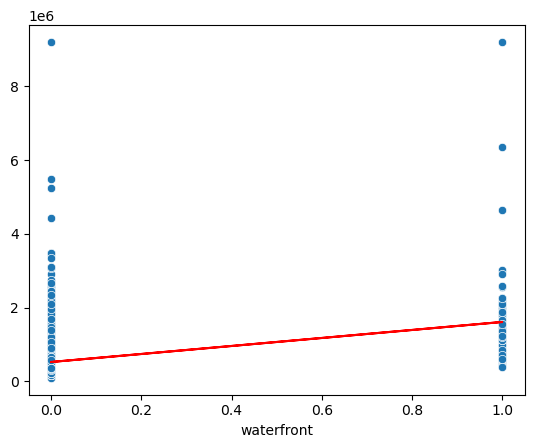

best fit line:
y = 487098.05 + 186070.29x


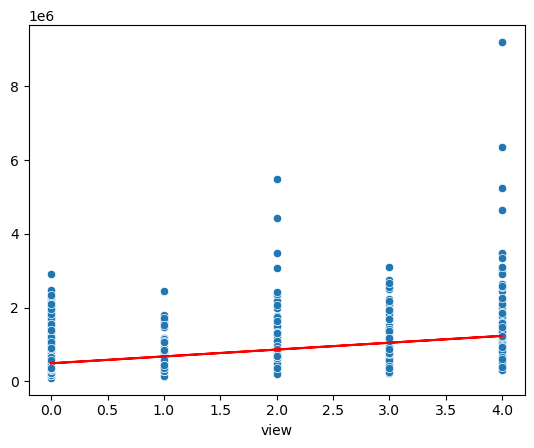

best fit line:
y = 449238.05 + 24205.30x


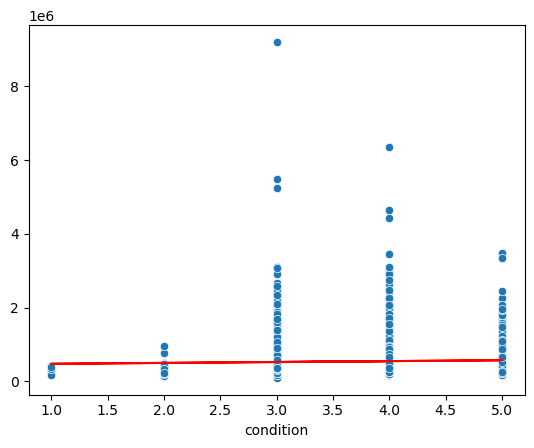

best fit line:
y = -1023362.44 + 203330.27x


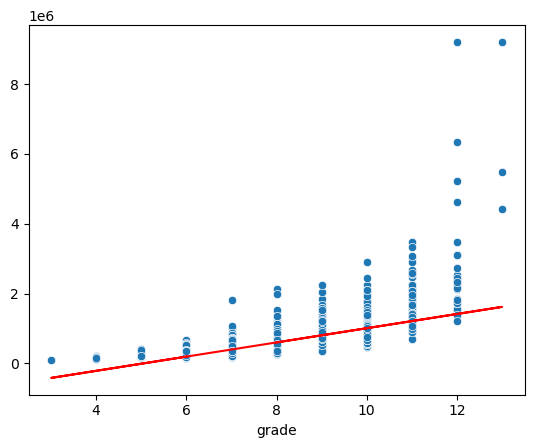

best fit line:
y = 74711.17 + 256.03x


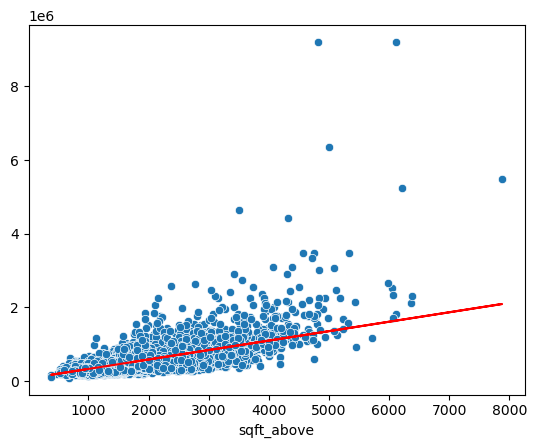

best fit line:
y = 452597.57 + 271.05x


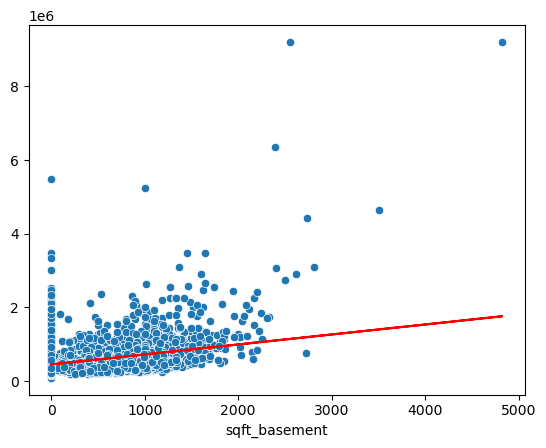

best fit line:
y = -755320.21 + 652.84x


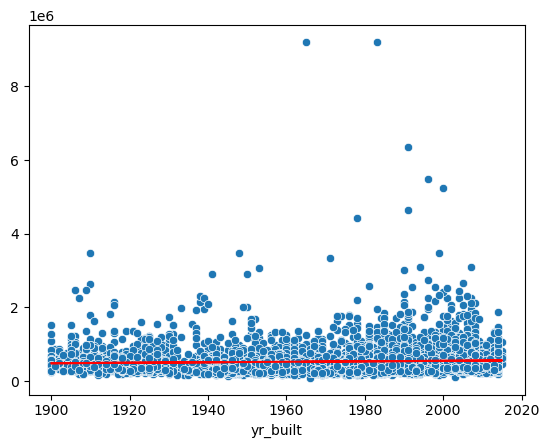

best fit line:
y = 521748.11 + 116.08x


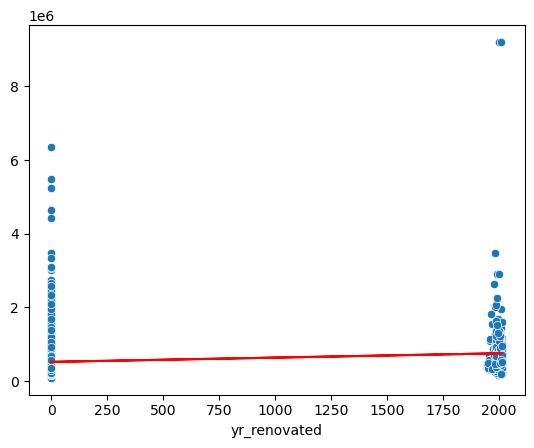

best fit line:
y = -37437435.32 + 798379.37x


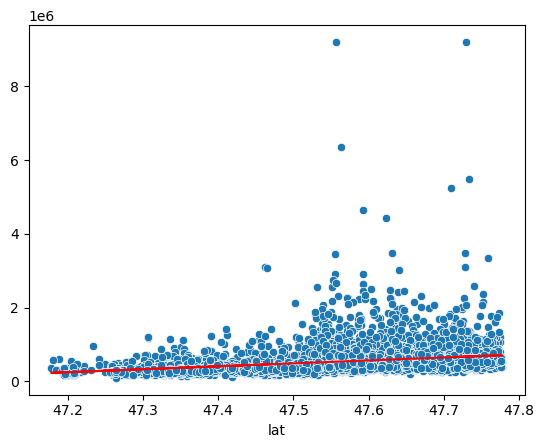

best fit line:
y = 9191474.50 + 70856.94x


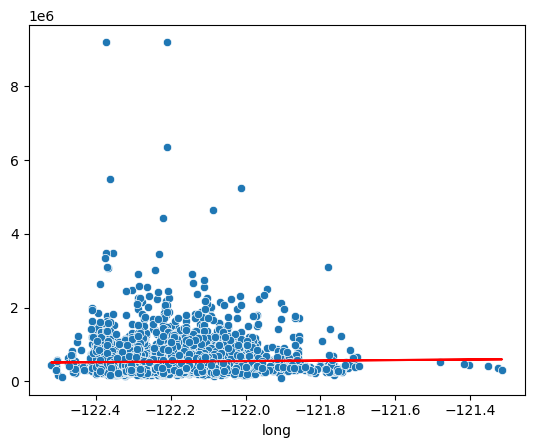

best fit line:
y = -10199024.82 + 5327.24x


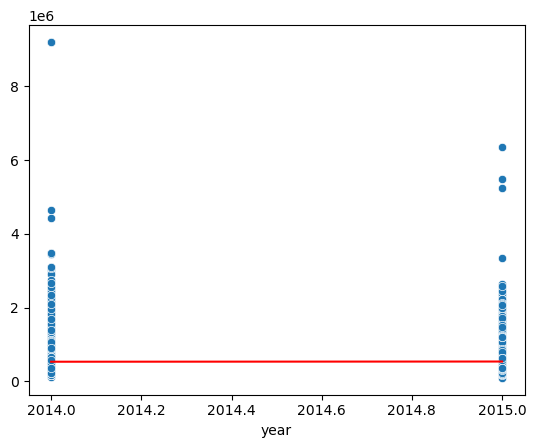

best fit line:
y = 547465.24 + -2393.09x


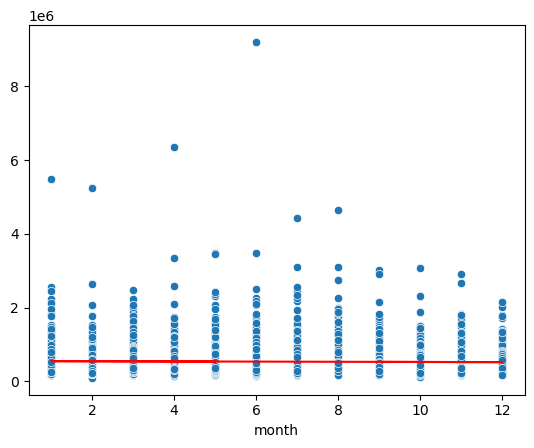

best fit line:
y = 539587.13 + -496.74x


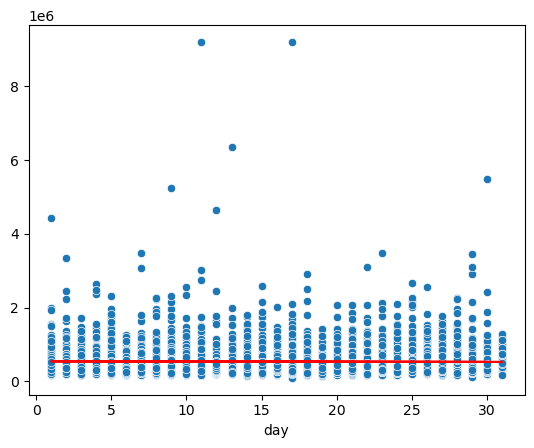

In [504]:
for i in Xtest.select_dtypes(include='number').columns:
    sns.scatterplot(x=Xtest[i],y=10 ** y_predict)
    a, b = best_fit(Xtest[i], 10 ** y_test)
    yfit = [a + b * xi for xi in Xtest[i]]
    plt.plot(Xtest[i], yfit, color='r')
    plt.show()

## **Testing the model with new values**

In [499]:
data = [[1,5,7,4000,9000,3,0,0,5,9,3000,1000,1990,1999,47.7211,-122.256,2015,12,25]]
df_to_predict = pd.DataFrame(data, columns=['cons','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view',
                                 'condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','lat','long',
                                 'year','month','day'])

In [500]:
data_predict= model.predict(df_to_predict)
int(10 ** data_predict)

2618878